In [1]:
%matplotlib inline 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import random
import re
import time
import math
import os
import sys
from sklearn.utils import shuffle

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy

Using TensorFlow backend.


In [2]:
import importlib
sys.path.append('..')
import Shared  # Shared.py holds functions common to all notebooks
importlib.reload(Shared)  # In case you make changes to the Shared.py file and don't want to restart the nb kernel 

<module 'Shared' from '/home/eduardo/Desktop/Link to dynamic-projections/Models/Shared.py'>

In [3]:
nb_name = 'esc50-AE_10f_10f_2f_40ep'

In [4]:
X, info_df, n_revisions, indexes_order = Shared.load_tabular('../../Datasets/esc50/')

In [5]:
os.getcwd()

'/home/eduardo/PhD/Projections/dynamic-projections/Models/ae'

In [6]:
info_df.head()

,X_index,cat,point_id,t
0,0,e,engine-974,101
1,1,b,brushing_teeth-843,39
2,2,s,siren-1613,50
3,3,c,crying_baby-104,5
4,4,e,engine-1923,20


In [7]:
# info_df[info_df['point_id'] == 'a-0']

In [8]:
n = X.shape[1]
ae = Sequential()
ae.add(Dense(10, activation='relu', input_shape=(n,)))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(2))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(n))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
ae.compile(loss='mse', optimizer='rmsprop')

In [10]:
%time ae.fit(X, X, nb_epoch=40)

Instructions for updating:
Use tf.cast instead.


/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/40
34560/34560 [==============================] - 2s 50us/step - loss: 91.9957
Epoch 2/40
34560/34560 [==============================] - 2s 44us/step - loss: 30.6519
Epoch 3/40
34560/34560 [==============================] - 2s 44us/step - loss: 30.2466
Epoch 4/40
34560/34560 [==============================] - 2s 44us/step - loss: 30.0424
Epoch 5/40
34560/34560 [==============================] - 1s 42us/step - loss: 29.8681
Epoch 6/40
34560/34560 [==============================] - 1s 42us/step - loss: 29.6853
Epoch 7/40
34560/34560 [==============================] - 2s 45us/step - loss: 29.5104
Epoch 8/40
34560/34560 [==============================] - 1s 43us/step - loss: 29.3757
Epoch 9/40
34560/34560 [==============================] - 1s 41us/step - loss: 29.2747
Epoch 10/40
34560/34560 [==============================] - 2s 44us/step - loss: 29.1798
Epoch 11/40
34560/34560 [==============================] - 1s 42us/step - loss: 29.1170
Epoch 12/40
34560/34560 [================

In [11]:
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1408      
Total params: 2,970
Trainable params: 2,970
Non-trainable params: 0
_________________________________________________________________


In [12]:
# ae.save('../Models/{}.h5'.format(nb_name))

Text(0.5, 0.98, 'loss')

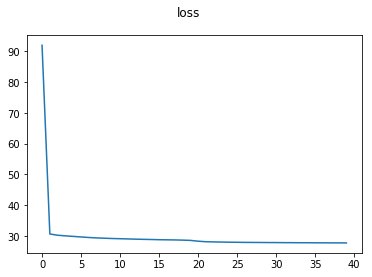

In [13]:
plt.figure()
plt.plot(ae.history.history['loss'])
plt.suptitle('loss')

In [14]:
n_revisions = info_df['t'].max() + 1

In [15]:
Shared.save_tabular_activations(ae, X, info_df, n_revisions, indexes_order, nb_name)

,id,t0d0,t0d1,t1d0,t1d1,t2d0,t2d1,t3d0,t3d1,t4d0,...,t103d0,t103d1,t104d0,t104d1,t105d0,t105d1,t106d0,t106d1,t107d0,t107d1
0,brushing_teeth-51,67.040535,-7.417089,86.226974,-12.310195,97.903938,-17.470074,101.446793,-21.728914,99.730247,...,106.289566,-29.440216,98.365288,-31.812796,86.344650,-33.509876,70.865372,-32.095539,52.970753,-26.472721
1,brushing_teeth-52,64.535767,-28.766127,85.814133,-38.255108,101.897034,-45.166771,111.559067,-49.234020,116.404755,...,127.316483,-32.088169,124.545624,-31.675505,116.694557,-30.011967,101.049919,-26.282320,78.108772,-20.329824
2,brushing_teeth-214,82.708710,-45.750523,106.196465,-60.077229,121.874588,-70.023216,130.035812,-75.154243,133.537476,...,99.407349,-82.477188,100.684601,-78.193153,96.907372,-72.081718,86.104385,-62.165348,68.547737,-47.262188
3,brushing_teeth-292,91.415039,-50.095760,120.657959,-64.621513,142.519485,-74.019112,155.459610,-77.912498,161.000854,...,92.985306,-111.948814,83.736763,-113.402855,71.494690,-109.776459,57.981876,-97.307976,43.585869,-75.988564
4,brushing_teeth-293,48.854984,-51.198631,62.897675,-70.734711,73.789375,-85.938461,81.508293,-94.940781,86.017471,...,79.582977,-105.320656,73.710625,-104.811203,66.155762,-98.986671,55.313644,-86.143890,41.378391,-66.708900
5,brushing_teeth-306,100.646049,-26.240492,126.491959,-35.813148,140.450012,-43.937794,143.617279,-49.989563,141.375412,...,116.716339,-47.687023,113.062393,-44.525692,107.657608,-39.095764,95.862984,-31.664442,76.008476,-22.957762
6,brushing_teeth-321,45.325825,-39.739925,59.938980,-53.903934,69.490494,-65.031128,72.858521,-71.820702,72.095238,...,113.436050,-81.152077,112.904388,-76.794472,108.308922,-69.971657,95.888710,-59.520756,75.173958,-45.431522
7,brushing_teeth-322,91.629272,-67.537796,119.912544,-87.644897,141.353271,-101.502937,155.139923,-108.556541,161.533630,...,175.054062,-72.175507,174.176758,-67.999893,165.772476,-61.313454,145.335342,-51.560818,113.131981,-38.974621
8,brushing_teeth-714,59.083225,-70.621651,76.442810,-92.138222,88.395348,-107.155640,94.387276,-115.701134,95.349609,...,92.475906,-121.059097,92.545883,-116.211662,91.136986,-103.956314,83.307106,-85.210312,67.364059,-62.451893
9,brushing_teeth-745,96.169571,23.997519,123.537094,29.580469,141.938034,32.717297,151.653854,33.941620,155.920029,...,148.677170,28.205553,146.701691,28.605490,138.558456,27.576555,121.292557,24.663525,94.813995,19.857985
